In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Here, we want look at current-based synapses. We assume that the current after the arrival of a spike can simply modeled by instantaneous current jump followed by an exponential decay. Thus, the current dynamics are governed by the differential equation

\begin{equation} \label{eq: deq I}
\tau\frac{dI(t)}{dt}=-I(t)+h\cdot s(t),
\end{equation}

where $\tau$ is the intrinsic synaptic time constant, $h$ is the synaptic efficacy and $s(t)$ represents the incoming spikes 

\begin{equation} \label{eq: spike train}
s(t)=\sum_{i}\delta(t-t_{i}).
\end{equation}

A spike arriving at $t_{i}$ will cause a jump of the current by $h$ followed by an exponential decay to $0$ due to the leek term. The efficacy $h$ can be positive in case of an excitatory or negative in case of inhibitory synapse. The homogeneous part of \ref{eq: deq I} can be written as 

\begin{equation}
O\,I(t)=0,
\end{equation}

with the differential operator $O$ given by $0=\tau\frac{d}{dt}+1$. To solve \ref{eq: deq I} with inhomogeneity, we can make use of the fact that $G(t)=\frac{1}{\tau}e^{-\frac{t}{\tau}}\theta(t)$ is the Green's function of the differential operator $O$, i.e. 

\begin{equation} \label{eq: Green's fcn}
O\,G(t)=\delta(t)
\end{equation}

Thus, convolving the Green's function with inhomogeneity $hs(t')$ yields the desired solution   

\begin{equation} \label{eq: solution I}
I(t)=\int_{-\infty}^{\infty}dt'\,G(t-t')\cdot hs(t').
\end{equation}

This can be seen if we insert \ref{eq: solution I} in \ref{eq: deq I} and use \ref{eq: Green's fcn}. Thus, for $s(t)$ given by \ref{eq: spike train} we arrive at 

\begin{equation}
I(t)=h\sum_{i=1}\int_{-\infty}^{\infty}dt'\,\frac{1}{\tau}e^{-\frac{t-t'}{\tau}}\Theta(t-t')\,\delta(t'-t_{i}).
\end{equation}

The delta-distribution gets rid of the integral leading to   

\begin{equation}
I(t) = h\sum_{i=1}\frac{1}{\tau}e^{-\frac{t-t_{i}}{\tau}}\Theta(t-t_{i}).
\end{equation}

Thus, we find that $I(t)$ is given by the superposition of individual exponentially decaying current jumps   invoked by the different spikes. We now look at time evolution of current assuming that the incoming spikes can be modeled by homogeneous Poisson process with rate $\lambda$. 

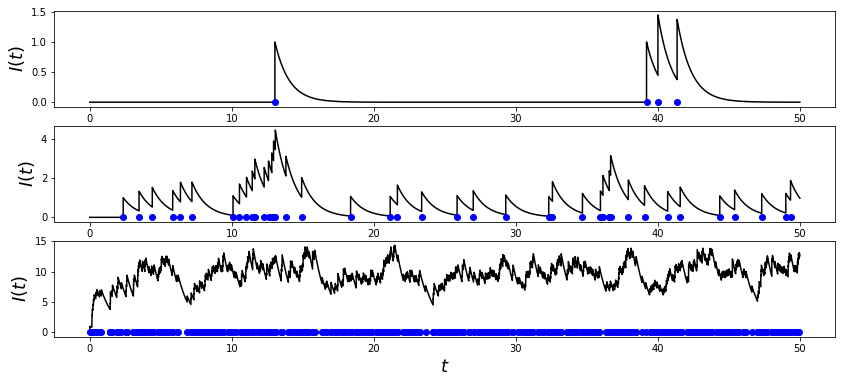

In [3]:
def poisson_spike_train(lam, T):
    '''Draw random spike times for a Poisson process with constant rate within the given time interval 
    :param lam: rate
    :param T: recording time  
    :return spike_train: spike times 
    '''
    n = np.random.poisson(T*lam)
    spike_train = np.random.uniform(0, T, n)

    return spike_train

def exp_decaying_current(t, spike_train, tau, h):
    '''Caculate current trace at time points t for incoming spike train
    :param t: time points
    :param spike_train: spike_times   
    :param tau: synaptic time constant
    :param h: synaptic efficacy
    :return I: current trace'''
    
    I = np.zeros_like(t)
    
    for t_spike in spike_train:
                    
        H_t = 0.5*(1 + np.sign(t-t_spike)) # heaviside function centered around spike time                    
        I += h/tau*np.exp(-(t-t_spike)/tau)*H_t # exponential decay 

    return I 

#------------------------------------------------------------------------------ 
# Plot Synaptic current for different input rates  
T = 50

lam0 = 0.1
lam1 = 1.
lam2 = 10.

spike_train0 = poisson_spike_train(lam0, T)
spike_train1 = poisson_spike_train(lam1, T)
spike_train2 = poisson_spike_train(lam2, T)


tau = 1. # intrinsic synapse time constant
h = 1. # efficacy 

delta_t = 0.001*tau # time step

t = np.linspace(0, T, int(np.ceil(T/delta_t))) # time points 

# calculate current traces for different input rates
I0 = exp_decaying_current(t, spike_train0, tau, h) 
I1 = exp_decaying_current(t, spike_train1, tau, h) 
I2 = exp_decaying_current(t, spike_train2, tau, h) 

plt.figure(figsize = (14, 6))
gs = plt.GridSpec(3, 1)

ax0 = plt.subplot(gs[0]) 
ax0.plot(t, I0, '-',  color = 'k')
ax0.plot(spike_train0, np.zeros_like(spike_train0), 'o', color = 'blue')

plt.ylabel('$I(t)$', fontsize = 18)

ax1 = plt.subplot(gs[1]) 
ax1.plot(t, I1, '-',  color = 'k')
ax1.plot(spike_train1, np.zeros_like(spike_train1), 'o', color = 'blue')

plt.ylabel('$I(t)$', fontsize = 18)

ax2 = plt.subplot(gs[2]) 
ax2.plot(t, I2, '-',  color = 'k')
ax2.plot(spike_train2, np.zeros_like(spike_train2), 'o', color = 'blue')

plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$I(t)$', fontsize = 18)

plt.show()



If the rate $\lambda$ is large compared the to relaxation time constant $\tau$ then the current will fluctuate around some stationary baseline after some initial transient. This can be seen in panel three of the above figure. 

Instead of solving

\begin{equation} \label{eq: deq I}
\tau\frac{dI(t)}{dt}=-I(t)+h\cdot s(t),
\end{equation}

for one specific realization of the spike train $s(t)$, we aim for a stochastic description which relates the statistics of the current trace to the statistics of the Poisson process. To time evolution of $I(t)$, we need to determine the probability density $\rho(I, t)$ which tells how likely it is to observe the current $I$ at time $t$. It can expressed terms of conditional probability $\rho(I,t|J,s)$ which leads to the Chapman-Kolmogorov equation    

\begin{equation}
\rho(I,t)=\int dJ\,\rho(I,t|J,s)\rho(J,s)
\end{equation}

The latter can be rewritten as an differential equation, which leads in second order to the Fokker-Planck equation 

\begin{equation} \label{fpe}
\frac{d\rho(I,t)}{dt}=\left(-\frac{d}{dI}A_{1}(I,t)+\frac{1}{2}\frac{d^{2}}{dI^{2}}A_{2}(I,t)\right)\rho(I,t).
\end{equation}

Defining the probability flux 

\begin{equation} \label{probability flux}
\Phi(I,t)=\left(A_{1}(I,t)-\frac{1}{2}\frac{d}{dI}A_{2}(I,t)\right)\rho(I,t).
\end{equation}

the Fokker-Planck equation can be written as continuity equation 

\begin{equation}
\frac{d}{dt}\rho(I,t)=-\frac{d}{dI}\Phi(I,t)
\end{equation}

Here, $A_{1}$ is the drift coefficient and $A_{2}$ the diffusion coefficient which are defined as  

\begin{equation} \label{infinitesimal moment}
A_{n}(I,t)=\lim_{\delta t \rightarrow 0}\frac{1}{\delta t}a_{n}(I,\delta t,\,t),
\end{equation}

where $a_{n}(I,t+\delta t,\,t)$ is the conditional moment defined as 

\begin{equation} \label{conditional moment}
a_{n}(I,\delta t,\,t)=\int d\Delta\,\Delta^{n}\rho(I+\Delta,t+\delta t|I,t)
\end{equation}

Here, $\rho(I+\Delta,t+\delta t|I,t)$ is the conditional probability that the current changed by $\Delta$ after a time step $\delta t$ assuming that the value of the current was $I$ at the $t$ beforehand. The above equation offers an intuitive explanation for the coefficients $a_{1}$ and $a_{2}$:
-  $a_{1}$ can be understood as the expected  drift averaged over all trajectories which start at time $t$ at $I$ step and than evolve from $t$ to $\delta t$ 


-  $a_{2}$ is the second moment, i.e. $a_{2}-a_{1}^2$ measures how the distribution of $\Delta$, and therefore $\rho(I,t)$ spreads with time

Will now determine the first two infinitesimal moments \ref{infinitesimal moment} for \ref{eq: deq I} under the assumption that $s(t)$ is Poisson distributed. Since ultimately, we are interested in the limes $\delta t \rightarrow 0$, we only need to consider two cases:

1. There is exactly one incoming spike in the interval $\delta t$, which happens with probability $p_{1}=\lambda \delta t$
2.  There is no incoming spike in the interval $\delta t$, which happens with probability $p_{2}=1-p_{1}$

For both cases, we determine the time-evolution of the current in the infinitesimal step $delta t$ which only depends on the current $I$ at the initial time point $t. For the first case, we get  

\begin{equation}
\Delta_{1}=I(t+\delta t)-I(t)=-\frac{I(t)}{\tau}\delta t+h.
\end{equation}

For the second case, we get

\begin{equation}
\Delta_{1}=I(t+\delta t)-I(t)=-\frac{I(t)}{\tau}\delta t.
\end{equation}

Thus, the conditional probability $\rho(I+\Delta,t+\delta t|I,t)$ in \ref{conditional moment} has only two discrete values so that the integral can be replaced by a sum

\begin{equation}
a_{n}(I,\delta t,t)=\Delta_{1}^{n}p_{1}+\Delta_{2}^{n}p_{2}
\end{equation}

Hence, the first two infinitesimal moments are given by 

\begin{equation}
a_{1}(I,\delta t,t)=\left(-\frac{I(t)}{\tau} + h\lambda\right)\delta t + \mathcal{O}(\delta t^{2}),
\end{equation}

and 

\begin{equation}
a_{2}(I,\delta t,t) = h^{2} \lambda \delta t.
\end{equation}

Inserting into \ref{infinitesimal moment} yields the first two infinitesimal moments  

\begin{equation}
A_{1}(I,t)= -\frac{1}{\tau}(I(t) - \mu),
\end{equation}

with expected baseline current $\mu=\tau \lambda h$ and  

\begin{equation}
A_{2}(I,t)= \frac{1}{\tau}\sigma^{2},
\end{equation}

with $\sigma^{2}=\tau \lambda h^2$. Inserting into \ref{probability flux} we arrive at

\begin{equation}
\frac{d}{dt}\rho(I,t)=-\frac{d}{dI}\Phi(I,t),
\end{equation}

with the probability flux $\Phi(I,t)$ given by

\begin{equation}
\Phi(I,t) = -\left(\frac{1}{\tau}(I(t) - \mu) + \frac{\sigma^{2} }{2 \tau}\frac{d}{dI} \right)\rho(I,t).
\end{equation}.

The same result could be obtained if we would replaced the Poisson input by Gaussian white noise with mean $\mu$ and variance $\sigma^2$. Hence, in second order approximation, we can effectively replace \ref{eq: deq I} by 

\begin{equation}
\frac{d}{dt}I(t)=-(I(t)-\mu)+\xi(t),
\end{equation}.

where $\xi(t)$ is Gaussian white noise with $\left< \xi(t) \right> = 0$ and $\left< \xi(t) \xi(t')\right> = \tau \sigma^2 \delta(t-t')$.

We will now generate an ensemble of trials and check if they are indeed centered around $\mu$ and if their fluctuations are of order $\tau \sigma^2$.   

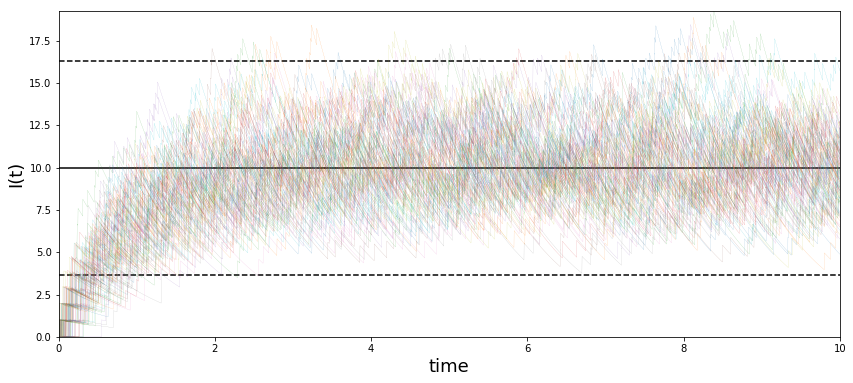

In [7]:
#------------------------------------------------------------------------------ 
# Diffusion approximation

lam = 10. # rate
tau = 1. # intrinsic synapse time constant
h = 1. # efficacy 

mu = tau*lam*h 
sig2 = tau**2*lam*h**2

N = 100 # number of trials
T = 10 # recording time 

delta_t = 0.001*tau # time step

M = int(np.ceil(T/delta_t)) # number of time points

t = np.linspace(0, T, M) # time points 

# I0 = mu*np.exp(-t/tau) # initial value 
# I_mat = np.tile(I0, (N,1))

I_mat = np.zeros((N,M))

for i in xrange(N):
    
    spike_train = poisson_spike_train(lam, T)
    I_mat[i, :] += exp_decaying_current(t, spike_train, tau, h)

plt.figure(figsize = (14, 6))

for I in I_mat:
    
    plt.plot(t, I, '-', linewidth = 0.1)


plt.ylim(0, max(I_mat.flatten()))
plt.xlim(0, t[-1])

plt.hlines(mu, 0, t[-1], colors = 'k', linestyles = '-', label = '$\mu$')
plt.hlines([mu - 2*np.sqrt(sig2), mu + 2*np.sqrt(sig2)], 0, t[-1], colors = 'k', linestyles = '--', label = ['$\mu - \sigma$', '$\mu + \sigma$'])
#plt.legend()
plt.xlabel('time', fontsize = 18)
plt.ylabel('I(t)', fontsize = 18)

plt.show()

